## Cryptocurrency Arbitrage Opportunity Analyzer

This program is made to analyze historical opportunities for profit in arbitrage trading across different cryptocurrency markets. 

It uses historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase, but could be adapted to analyze other markets. It is written to import CSV files which have Timestamp and Close columns, the Close representing the closing price for that timestamp. It was written to analyze these specific files but could be used on other files with the same format.

First it imports and prepares the data for analysis.

Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

3. Analyze the data. 



In [31]:
# importing required libraries
import pandas as pd
from pathlib import Path

# importing local modules made for this application
from utils.fileio import cryptoprices_data_import
from utils.data_functions import data_clean
from utils.data_functions import data_slice_close


%matplotlib inline

In [32]:
# Import and format the data from the Bitstamp data set.
bitstamp = cryptoprices_data_import("Resources/bitstamp.csv")

In [33]:
# Preview the first five lines of the Bitstamp data set to be sure it imported properly.
print("First five lines of the Bitstamp data set:")
bitstamp.head()

First five lines of the Bitstamp data set:


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [34]:
# Import and format the data from the Coinbase data set.
coinbase = cryptoprices_data_import("Resources/coinbase.csv")

In [35]:
# Preview the first five lines of the Coinbase data set to be sure it imported properly.
print("First five lines of the Coinbase data set:")
coinbase.head()

First five lines of the Coinbase data set:


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [36]:
# Clean the Bitstamp data for analysis (remove null values, remove dollars signs, convert to float values, remove duplicate entries)
bitstamp = data_clean(bitstamp)

C:\Users\phods\OneDrive\Desktop\Fintech Bootcamp\Module 03\Cryptocurrency-Arbitrage-Opportunity-Analyzer\utils\data_functions.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pricedata.loc[:, "Close"] = pricedata.loc[:, "Close"].str.replace("$", "")
C:\Users\phods\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
# Clean the Coinbase data for analysis (remove null values, remove dollars signs, convert to float values, remove duplicate entries)
coinbase = data_clean(coinbase)

C:\Users\phods\OneDrive\Desktop\Fintech Bootcamp\Module 03\Cryptocurrency-Arbitrage-Opportunity-Analyzer\utils\data_functions.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pricedata.loc[:, "Close"] = pricedata.loc[:, "Close"].str.replace("$", "")
C:\Users\phods\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

In [38]:
# Slices the Bitstamp data frame to only include the timestamp and close price columns.
bitstamp_sliced = data_slice_close(bitstamp)

# Reviews the first five rows of the Bitstamp close data
print("The first five rows of the Bitstamp closing price data:")
bitstamp_sliced.head()

The first five rows of the Bitstamp closing price data:


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [39]:
# Slices the Coinbase data frame to only include the timestamp and close price columns.
coinbase_sliced = data_slice_close(coinbase)

# Reviews the first five rows of the Coinbase close data
print("The first five rows of the Coinbase closing price data:")
coinbase_sliced.head()

The first five rows of the Coinbase closing price data:


Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [40]:
# Generate the summary statistics for the bitstamp DataFrame
print("Summary statistics of Bitstamp close prices:")
bitstamp_sliced.describe()

Summary statistics of Bitstamp close prices:


count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [41]:
# Generate the summary statistics for the coinbase DataFrame
print("Summary statistics of Coinbase close prices:")
coinbase_sliced.describe()

Summary statistics of Coinbase close prices:


count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp closing prices'}, xlabel='Timestamp'>

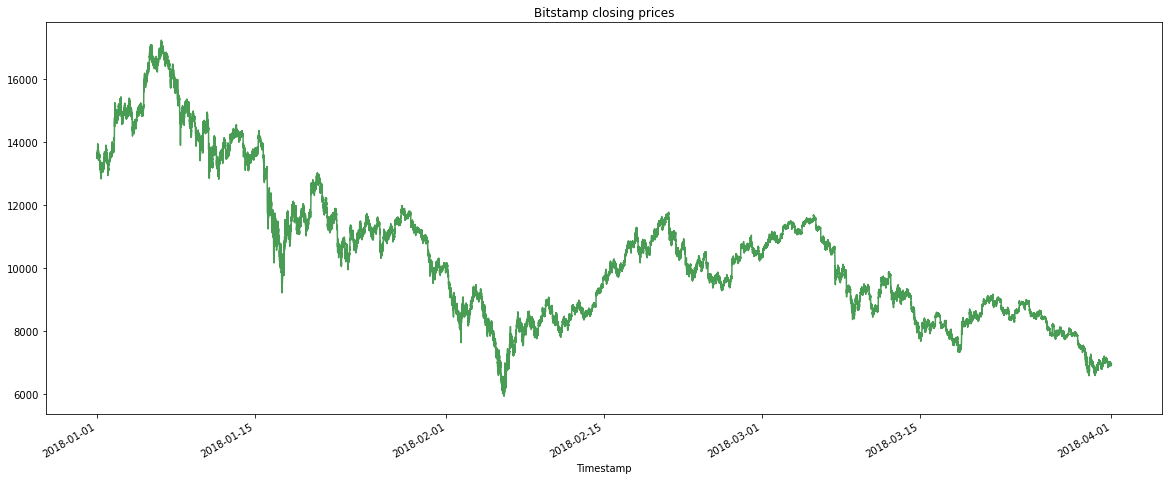

In [45]:
# Plots a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(figsize=[20,8], title="Bitstamp BTC closing prices", color="#499C53")

<AxesSubplot:title={'center':'Coinbase BTC closing prices'}, xlabel='Timestamp'>

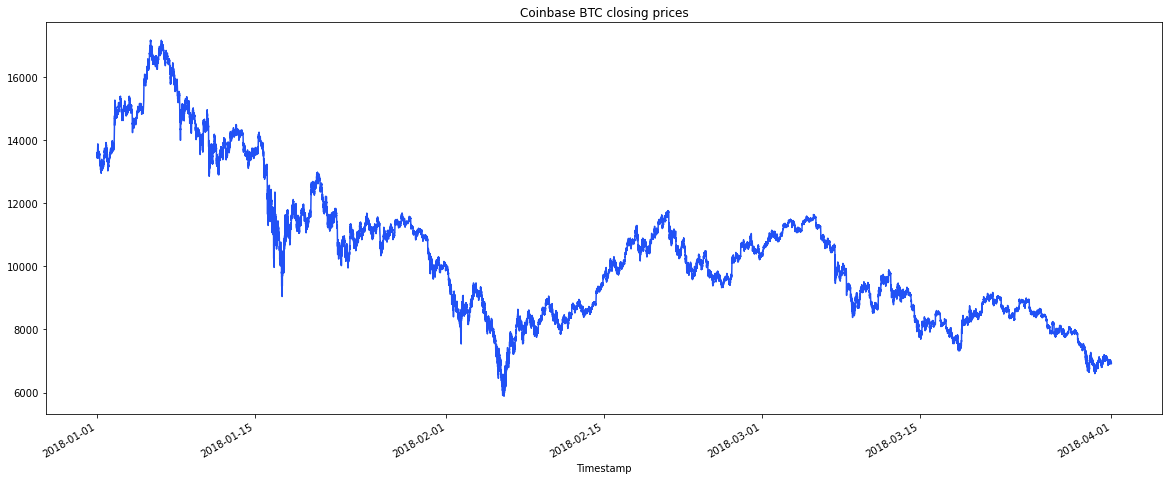

In [49]:
# Plots a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=[20,8], title="Coinbase BTC closing prices", color="#2151F5")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase close prices'}, xlabel='Timestamp'>

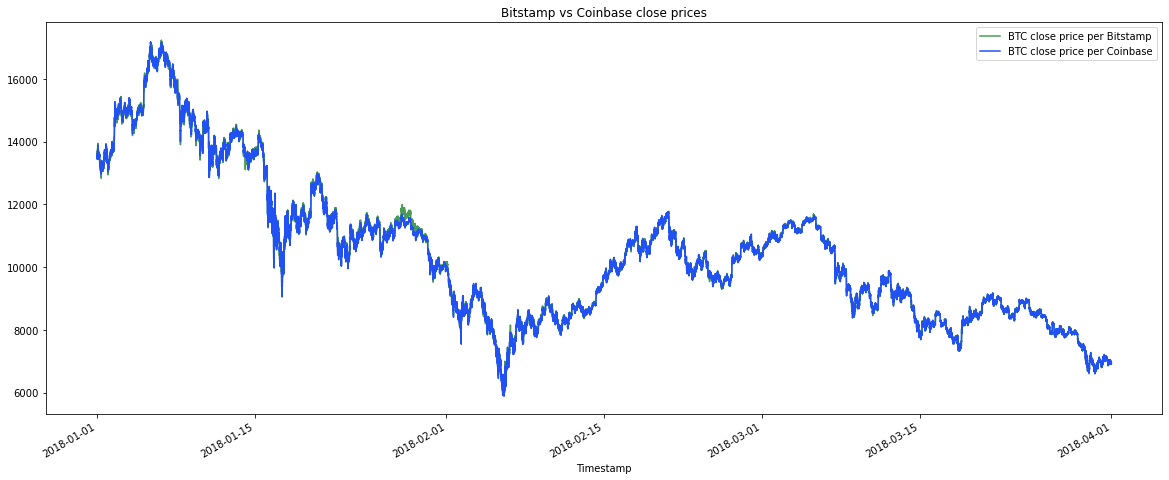

In [51]:
# Overlays the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(20,8), title="Bitstamp vs Coinbase close prices", color="#499C53", label="BTC close price per Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(20,8), color="#2151F5", label="BTC close price per Coinbase")

In [15]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

In [16]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [17]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

In [18]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = # YOUR CODE HERE

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-18-9c1f332784dd>, line 3)

In [ ]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE

In [ ]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

In [ ]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = # YOUR CODE HERE

# Generate summary statistics 
# YOUR CODE HERE

In [ ]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE

In [ ]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

In [ ]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = # YOUR CODE HERE

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE

In [ ]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [ ]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [ ]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [ ]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [ ]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [ ]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE